<a href="https://colab.research.google.com/github/SFS-48/Week1-StudentPerformance-EDA/blob/main/Week1_StudentPerformance_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Week 1 – Student Performance Analysis (EDA)

##Objective:
  Analyze student exam scores (Math, Reading, Writing) to find patterns based on:

- Gender

- Parental education level

- Lunch type

- Test preparation course

 ## Step 1:
Load Dataset

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files  # Required for uploading files in Colab

# Upload the CSV file from your computer
uploaded = files.upload()

# Get the uploaded file name
filename = list(uploaded.keys())[0]

# Load the dataset into a pandas DataFrame
df = pd.read_csv(filename)

# Preview first 5 rows to confirm dataset is loaded correctly
df.head()


Saving StudentsPerformance.csv to StudentsPerformance.csv


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


##Step 2: Explore the Data

Check dataset structure, data types, and basic statistics.

Identify categorical and numerical columns.

In [3]:
# Display dataset info: column names, data types, non-null values
df.info()

# Summary statistics of numerical columns
df.describe()

# Check unique values in categorical columns
for col in ['gender', 'parental level of education', 'lunch', 'test preparation course']:
    print(f"\nUnique values in {col}: {df[col].unique()}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB

Unique values in gender: ['female' 'male']

Unique values in parental level of education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Unique values in lunch: ['standard' 'free/reduced']

Unique values in te

##Step 3: Check for Missing Values

Ensure the dataset is clean before analysis.

In [4]:
# Check for missing/null values in the dataset
df.isnull().sum()


,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


Result shows no missing values. Dataset is clean.

##Step 4: Analyze Score Patterns

Use groupby and mean to see trends across categories.

In [5]:
# Average scores by gender
gender_scores = df.groupby('gender')[['math score','reading score','writing score']].mean()
print("Average Scores by Gender:\n", gender_scores)

# Average scores by lunch type
lunch_scores = df.groupby('lunch')[['math score','reading score','writing score']].mean()
print("\nAverage Scores by Lunch Type:\n", lunch_scores)

# Average scores by test preparation course
prep_scores = df.groupby('test preparation course')[['math score','reading score','writing score']].mean()
print("\nAverage Scores by Test Preparation Course:\n", prep_scores)

# Average scores by parental education
parent_scores = df.groupby('parental level of education')[['math score','reading score','writing score']].mean()
print("\nAverage Scores by Parental Level of Education:\n", parent_scores)


Average Scores by Gender:
         math score  reading score  writing score
gender                                          
female   63.633205      72.608108      72.467181
male     68.728216      65.473029      63.311203

Average Scores by Lunch Type:
               math score  reading score  writing score
lunch                                                 
free/reduced   58.921127      64.653521      63.022535
standard       70.034109      71.654264      70.823256

Average Scores by Test Preparation Course:
                          math score  reading score  writing score
test preparation course                                          
completed                 69.695531      73.893855      74.418994
none                      64.077882      66.534268      64.504673

Average Scores by Parental Level of Education:
                              math score  reading score  writing score
parental level of education                                          
associate's degree         

## Step 5: Visualize the Data

Create plots to clearly show trends and differences.

###Gender vs Scores

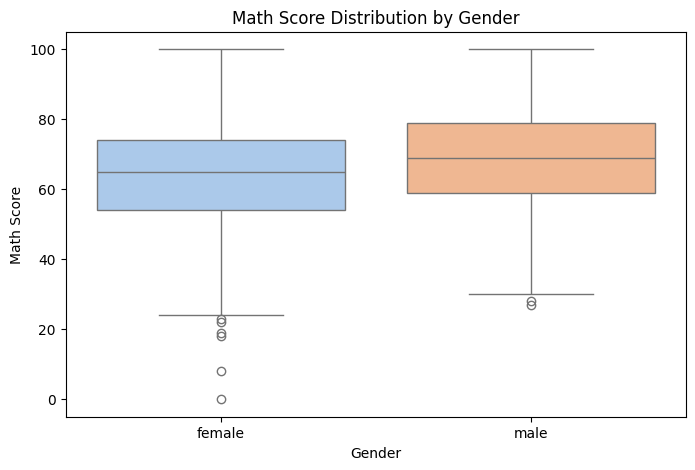

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='gender', y='math score', palette='pastel', hue='gender', dodge=False)
plt.title("Math Score Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Math Score")
plt.show()


### Lunch Type vs Scores

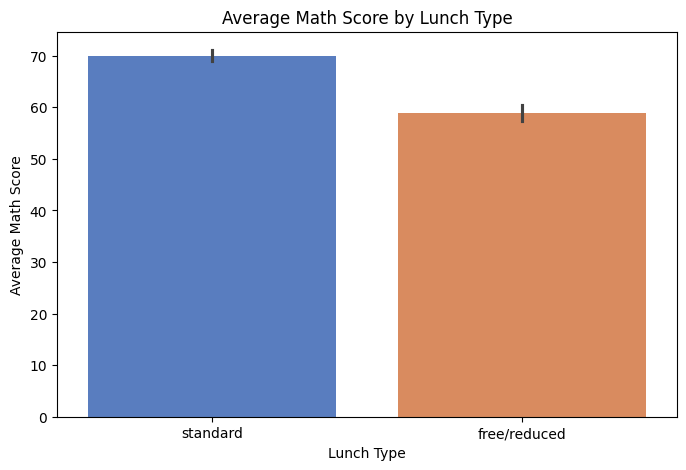

In [25]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=df,
    x='lunch',
    y='math score',
    palette='muted',
    hue='lunch',      # assign x variable to hue
    dodge=False,      # avoid splitting bars
    estimator='mean'
)
plt.legend([],[], frameon=False)  # hide the legend
plt.title("Average Math Score by Lunch Type")
plt.xlabel("Lunch Type")
plt.ylabel("Average Math Score")
plt.show()


### Test Preparation vs Scores

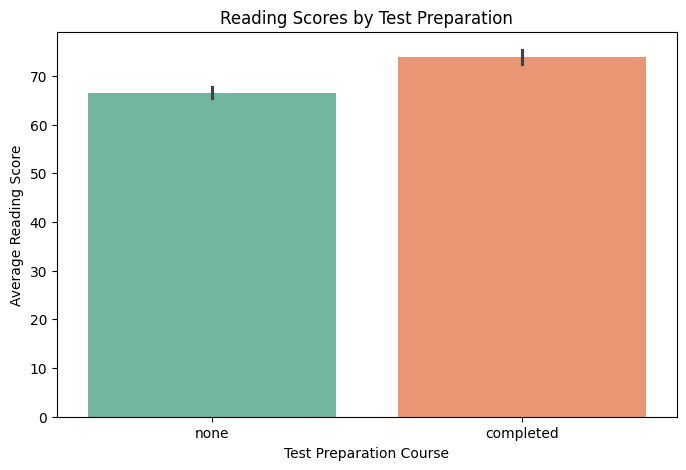

In [26]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=df,
    x='test preparation course',
    y='reading score',
    palette='Set2',
    hue='test preparation course',  # assign x variable to hue
    dodge=False,                    # avoid splitting bars
    estimator='mean'
)
plt.legend([],[], frameon=False)  # hide the extra legend
plt.title("Reading Scores by Test Preparation")
plt.xlabel("Test Preparation Course")
plt.ylabel("Average Reading Score")
plt.show()


### Parental Education vs Scores

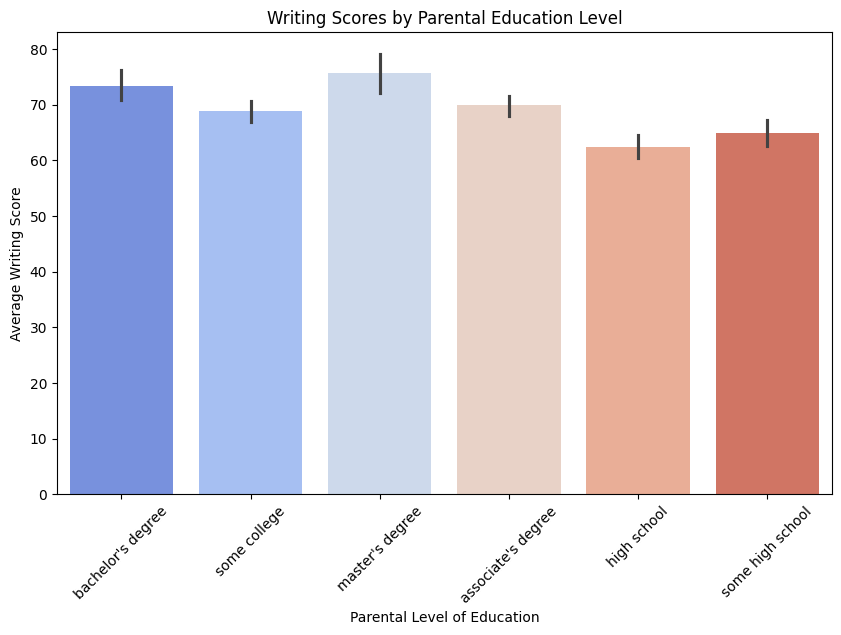

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=df,
    x='parental level of education',
    y='writing score',
    palette='coolwarm',
    hue='parental level of education',  # assign x variable to hue
    dodge=False                         # prevent splitting bars
)
plt.legend([],[], frameon=False)        # hide extra legend
plt.title("Writing Scores by Parental Education Level")
plt.xlabel("Parental Level of Education")
plt.ylabel("Average Writing Score")
plt.xticks(rotation=45)
plt.show()


### Distribution of All Scores

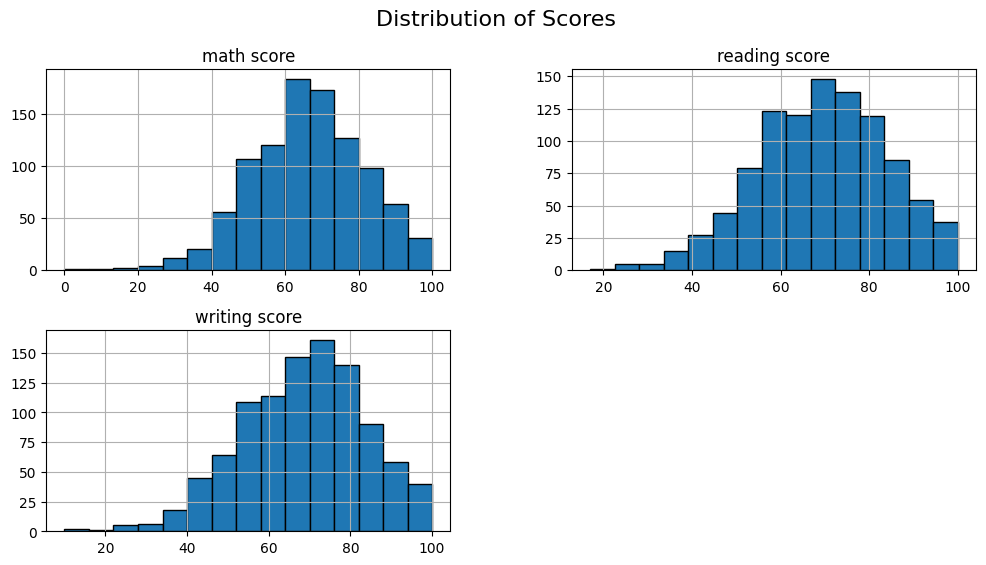

In [28]:
df[['math score','reading score','writing score']].hist(
    bins=15,
    edgecolor='black',
    figsize=(12,6)
)
plt.suptitle("Distribution of Scores", fontsize=16)
plt.show()


##Step 6: Summarize Insights

## Key Insights:

- Gender Difference: Females perform better in reading and writing; males slightly better in math.

- Lunch Effect: Standard lunch students score higher than free/reduced lunch.

- Test Preparation: Completing the test preparation course boosts reading and writing scores.

- Parental Education: Higher parental education correlates with higher student scores.

- Score Distribution: Most scores range from 60–80 with a few outliers.